<a href="https://colab.research.google.com/github/gani88/ML-DataScience/blob/main/Dicoding_ML_StudyCase_FeatureEngineering_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Study Case 2

In [53]:
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
X, y = make_classification(
    n_samples=1000,
    n_features=15,
    n_informative=10,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.9],
    flip_y=0,
    random_state=42
)

In [9]:
X[0]

array([ 0.09330264, -3.47251979, -1.3141989 ,  3.52574321,  0.64213753,
        2.24732763,  3.06750211,  1.14630086, -2.17311171,  2.7658277 ,
       -1.82125842,  1.45982633, -1.02459207,  1.00555885, -0.27655786])

In [14]:
# Change to DataFrame
df = pd.DataFrame(X, columns=[f'fitur_{i}' for i in range(1, 16)])
df['target'] = y

In [19]:
# Add some 'categorical' feature
df['fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

In [20]:
df

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15,target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,Y,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,A,X,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Z,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,Y,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,A,Z,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,B,Y,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Y,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Y,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,Z,-0.128774,0.800834,0


In [23]:
# Divide dependent and independent feature
X = df.drop('target', axis=1)
y = df['target']

In [24]:
X

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,Y,1.005559,-0.276558
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,A,X,-0.243630,0.285979
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Z,2.486020,-2.867291
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,Y,-0.788215,1.255376
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,A,Z,0.712335,2.810524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,B,Y,-0.387151,-2.629004
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Y,0.886822,-1.248408
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Y,0.067260,0.931995
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,Z,-0.128774,0.800834


In [25]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,1
998,0


In [28]:
# Checking Class distribution before Feature Engineering (SMOTE)

print("Class Distribution before SMOTE : ", Counter(y))

Class Distribution before SMOTE :  Counter({0: 901, 1: 99})


In [32]:
# Using embedded method for feature selection

# Using Random forest to get important feature
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['fitur_12', 'fitur_13'], axis=1)
rf_model.fit(X_integer, y)

# Get the important feature
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Define upper limit for important feature
threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Show important feature with the value
print("Feature that have been choosen using Embedded Methods :")
for i in important_features_indices:
    print(f"{X.columns[i]}: {importances[i]}")

# Get the name of column based on importances
important_features = X_integer.columns[important_features_indices]

# Move important feature to the new var
X_important = X_integer[important_features]

print("\nTraining Data Dimension with important feature: ", X_important.shape)

Feature that have been choosen using Embedded Methods :
fitur_2: 0.11860019897866206
fitur_3: 0.06878603593465271
fitur_5: 0.07731131335837178
fitur_8: 0.050482655781999855
fitur_9: 0.2625049418105367
fitur_10: 0.08958259568334655
fitur_11: 0.06365230544114515
fitur_13: 0.12578161860669113

Training Data Dimension with important feature:  (1000, 8)


In [33]:
X_selected = pd.concat([X_important, X['fitur_12']], axis=1)
X_selected = pd.concat([X_selected, X['fitur_13']], axis=1)
X_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,Y
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,A,X
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,B,Z
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,C,Y
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,A,Z
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,B,Y
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,A,Y
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,B,Y
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,C,Z


In [35]:
# Encode categorical feature
label_encoder = LabelEncoder()

X_selected['fitur_12'] = label_encoder.fit_transform(X_selected['fitur_12'])
X_selected['fitur_13'] = label_encoder.fit_transform(X_selected['fitur_13'])

X_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,0,1
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,0,0
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,1,2
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,2,1
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,0,2
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,1,1
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,0,1
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,1,1
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,2,2


In [37]:
# Checking outlier

# Choosing numeric column
numeric_columns = X_selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['fitur_12', 'fitur_13'])

X_cleaned = X_important.copy()

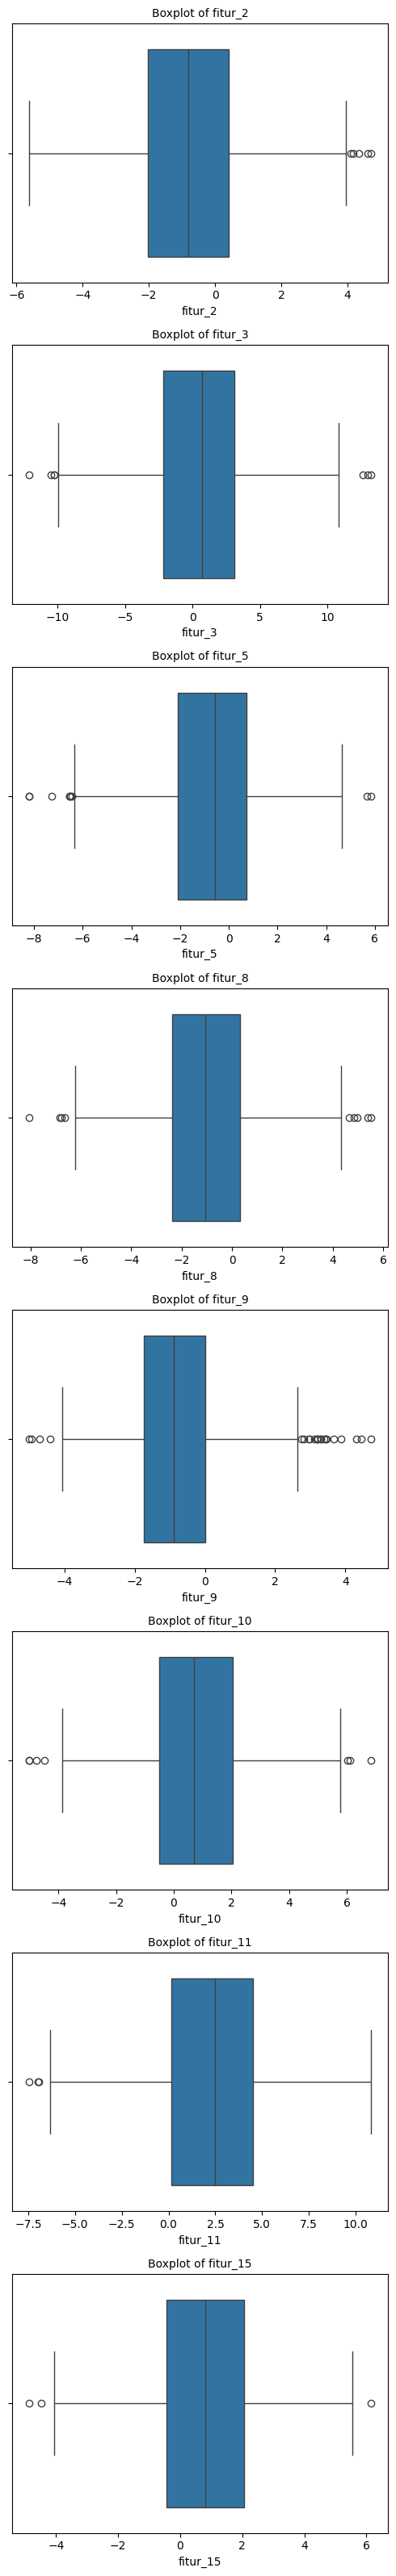

In [41]:
plt.figure(figsize=(5, len(numeric_columns) * 4))  # Adjust figure size based on number of features
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # One subplot per column
    sns.boxplot(x=X_cleaned[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [43]:
for col in numeric_columns:
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]

    # Remove outlier
    X_cleaned = X_cleaned.drop(outliers.index)

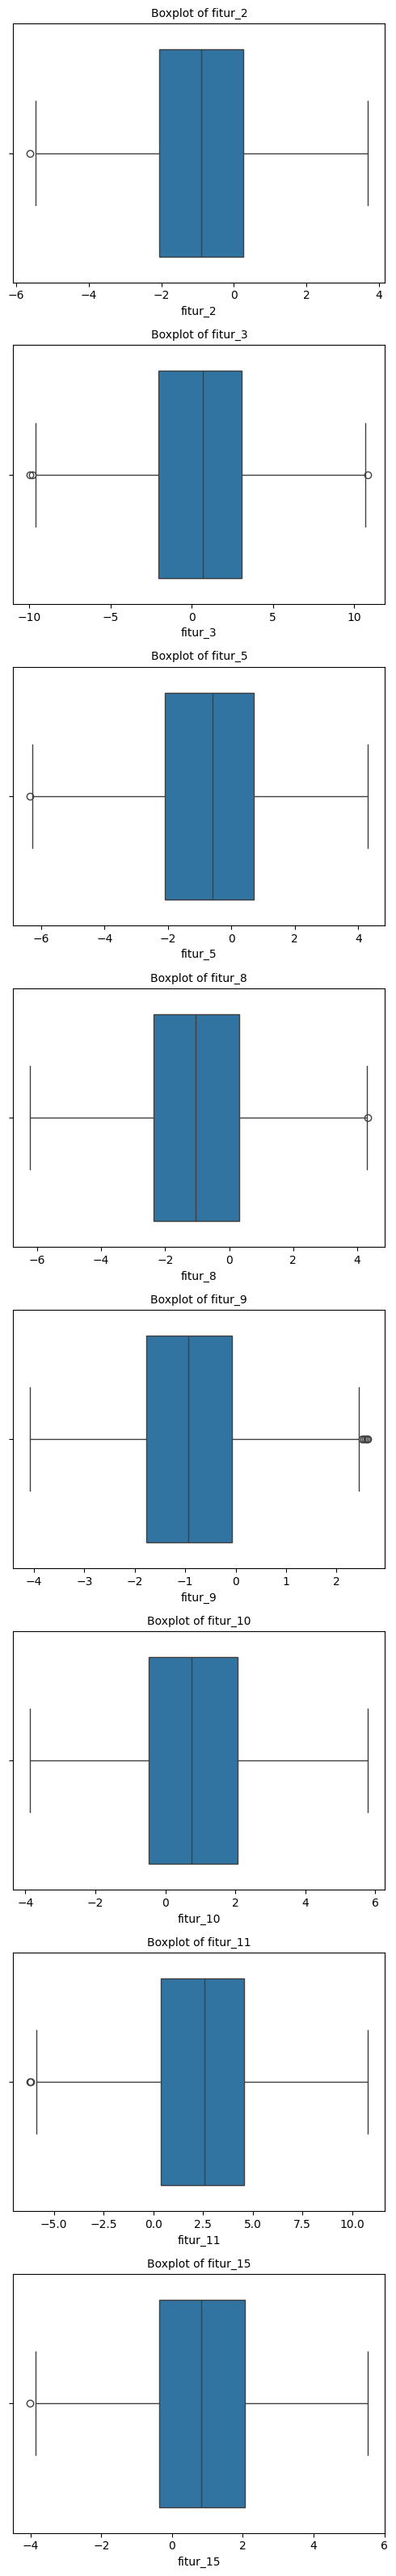

In [44]:
plt.figure(figsize=(5, len(numeric_columns) * 4))  # Adjust figure size based on number of features
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # One subplot per column
    sns.boxplot(x=X_cleaned[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [45]:
X_cleaned

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


# SMOTE METHOD

In [48]:
# Ensure X_cleaned and y are pandas objects
X_cleaned = pd.DataFrame(X_cleaned)  # Ensure X_cleaned is a DataFrame
y = pd.Series(y, name='Target')      # Ensure y is a Series

# Synchronize y with X_cleaned
y_synchronized = y.loc[X_cleaned.index]

# Check if the number of samples matches
print("X_cleaned shape: ", X_cleaned.shape)
print("y_synchronized shape: ", y_synchronized.shape)


X_cleaned shape:  (949, 8)
y_synchronized shape:  (949,)


In [49]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_synchronized)

print("Class Distribution after SMOTE : ", Counter(y_resampled))

# Change to dataframe
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Class Distribution after SMOTE :  Counter({0: 875, 1: 875})


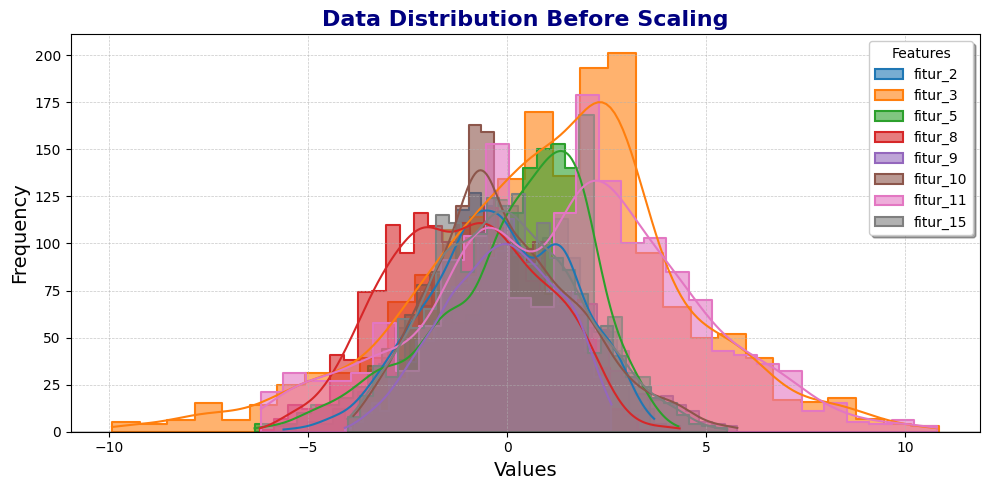

In [52]:
# Visualization of data distribution with enhancements
plt.figure(figsize=(10, 5))

# Loop through each column and create a histogram with a smooth kernel density estimate (KDE)
for col in X_resampled.columns:
    sns.histplot(
        X_resampled[col],
        kde=True,
        label=col,
        bins=30,
        element='step',
        alpha=0.6,  # Slight transparency for overlapping areas
        linewidth=1.5  # Enhance line clarity
    )

# Adding gridlines and labels for better readability
plt.title("Data Distribution Before Scaling", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)  # Baseline for visual context

# Improved legend placement and style
plt.legend(title="Features", loc="upper right", fontsize=10, fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()


In [56]:
# Scaling using standarization
scaler = StandardScaler()

X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

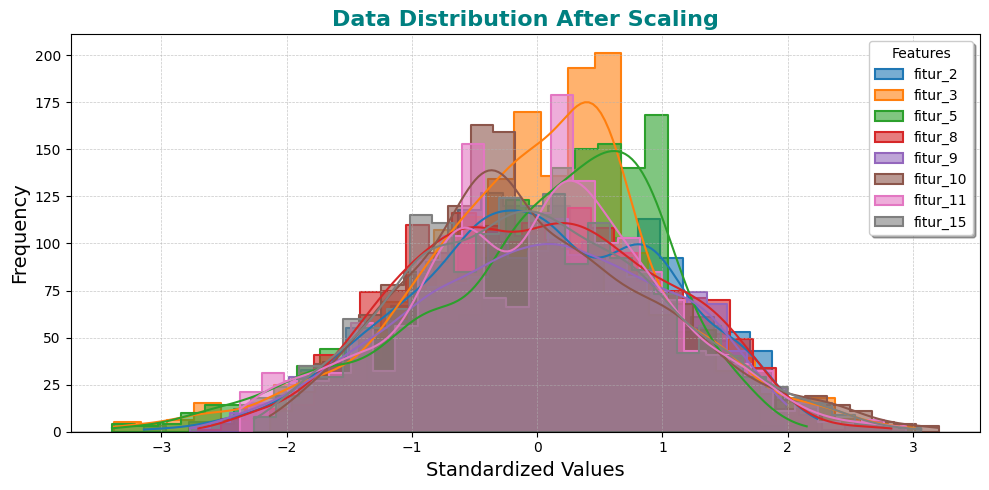

In [58]:
plt.figure(figsize=(10, 5))

# Loop through each column and create a histogram with a smooth kernel density estimate (KDE)
for col in X_resampled.columns:
    sns.histplot(
        X_resampled[col],
        kde=True,
        label=col,
        bins=30,
        element='step',
        alpha=0.6,  # Slight transparency for overlapping areas
        linewidth=1.5  # Enhance line clarity
    )

# Adding gridlines and labels for better readability
plt.title("Data Distribution After Scaling", fontsize=16, fontweight='bold', color='teal')
plt.xlabel("Standardized Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)  # Baseline for visual context

# Improved legend placement and style
plt.legend(title="Features", loc="upper right", fontsize=10, fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()

In [59]:
X_resampled.describe(include='all')

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-2.436147e-17,3.248195e-17,-4.060244e-18,3.248195e-17,0.000000,9.744586e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160e+00,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-5.875147e-01,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,1.916188e-01,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,7.374792e-01,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233e+00,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00
